#**CS 4210 Final Project**
Team: Nathan Pham, Robert Toribio, Ly Hoang, Rida Siddiqui

# determine suitable attributes for the hyperparameter:
n_estimators [100, 500, 1000]
criterion [gini, entropy]
max_depth [dunno yet]
max_features [dunno yet]

https://scikit-learn.org/stable/modules/grid_search.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/cross_validation.html

#**1.Setup: Getting data and libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from google.colab import data_table
url = 'https://raw.githubusercontent.com/robo27918/cs4210_finalproject/main/b_depressed.csv'
df1 = pd.read_csv(url)# Dataset is now stored in a Pandas Dataframe

#we have some null values in the dataset, specifically 20 in the no_lasting_investmen 
df1.info()
#check if there are duplicates in our dataset?
#duplicateRows = df1[df1.duplicated()]
#print("is there duplicate rows",duplicateRows)
print("no_lastin_investmen:", df1['no_lasting_investmen'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [ ]:
columns = df1.columns
columns=list(columns)
df1['no_lasting_investmen']


0       28292707.0
1       28292707.0
2       28292707.0
3       69219765.0
4       43419447.0
           ...    
1424    28292707.0
1425    47384361.0
1426    10454478.0
1427    28292707.0
1428    13012488.0
Name: no_lasting_investmen, Length: 1429, dtype: float64

#2.Features in dataset
* Survey_id
* Ville_id
* sex
* Age
* Married
* Number_children
* education_level
* total_members
* gained_asset
* durable_asset
* save_asset
* living_expenses
* other_expenses
* incoming_salary
* incoming_own_farm
* incoming_business
* incoming_no_business
* incoming_agricultural
* farm_expenses
* labor_primary
* lasting_investment
* no_lasting_investmen
* depressed

In [ ]:
df1.head

<bound method NDFrame.head of       Survey_id  Ville_id  sex  Age  Married  Number_children  \
0           926        91    1   28        1                4   
1           747        57    1   23        1                3   
2          1190       115    1   22        1                3   
3          1065        97    1   27        1                2   
4           806        42    0   59        0                4   
...         ...       ...  ...  ...      ...              ...   
1424        255        22    1   25        1                1   
1425        547        69    1   28        1                4   
1426        893       184    1   66        0                0   
1427        363        75    1   51        1                1   
1428        231        12    1   33        0                4   

      education_level  total_members  gained_asset  durable_asset  ...  \
0                  10              5      28912201       22861940  ...   
1                   8              5     

In [ ]:
#gained_asset=df1['gained_asset']
#print(gained_asset)
sex = df1.groupby('sex').size()
married = df1.groupby ('Married').size()
class_distribution =df1.groupby('depressed').size()
education_lvl_dist = df1.groupby('education_level').size()
incoming_salary = df1.groupby("incoming_salary").size()
#print(sex)
print(sex)


sex
0     117
1    1312
dtype: int64


FOR REFERENCE ONLY: (DELETE LATER)
<br>
<br>Survey_id,Ville_id,

sex,Age, Married , Number_children, education_level, total_members , gained_asset (house or land), durable_asset (car, furniture) ,save_asset (savings),

living_expenses ,other_expenses,incoming_salary, incoming_own_farm,incoming_business,

incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed

Expected contributors: Married (-), total_members (high  then -), incoming_salary ( high then -) , living_expenses (high then +) , 
gained_asset (high then - ) [house or land], durable_asset (high then -) [car, furniture] ,save_asset (high then - )  [savings,


sex distribution:
0     117 
1    1312


# 3.Data Exploration
##Distribution of some features

 

<br> *Class distribution*

| Depressed | Total |
|-----------|-------|
| 0         | 1191  |
| 1         | 238   |

<br>*Marital Status distribution*

| Marital Status | Total |
|----------------|-------|
| 0              | 325   |
| 1              | 1104  |

<br>*Incoming Salary (yes or no) distribution*

| Incoming Salary | Total |
|-----------------|-------|
| 0               | 1172  |
| 1               | 257   |

<br>*Sex distribution*

| Sex  | Total | %     |
|------|-------|-------|
| 0(M)    | 117   | 0.082 |
| 1 (F)   | 1312  | .918  |

##Statistical Properties of some Features

In [ ]:

df1['Age'].describe()

count    1429.000000
mean       34.777467
std        13.986219
min        17.000000
25%        25.000000
50%        30.000000
75%        42.000000
max        91.000000
Name: Age, dtype: float64

In [ ]:
df1['total_members'].describe()

count    1429.000000
mean        4.969209
std         1.786317
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        12.000000
Name: total_members, dtype: float64

In [ ]:
df1['Number_children'].describe()

count    1429.000000
mean        2.883135
std         1.874472
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        11.000000
Name: Number_children, dtype: float64

In [ ]:
df1['incoming_agricultural'].describe().apply(lambda x: format(x, 'f'))

count        1429.000000
mean     34510389.117565
std      20778461.796432
min        325112.000000
25%      23222287.000000
50%      30028818.000000
75%      40038424.000000
max      99789095.000000
Name: incoming_agricultural, dtype: object

In [ ]:
df1['farm_expenses'].describe(include=[np.number]).apply(lambda x: format(x, 'f'))

count        1429.000000
mean     35491525.540938
std      21123715.457064
min        271505.000000
25%      22799659.000000
50%      31363432.000000
75%      43485844.000000
max      99651194.000000
Name: farm_expenses, dtype: object

##Data plots
###Correlation matrix

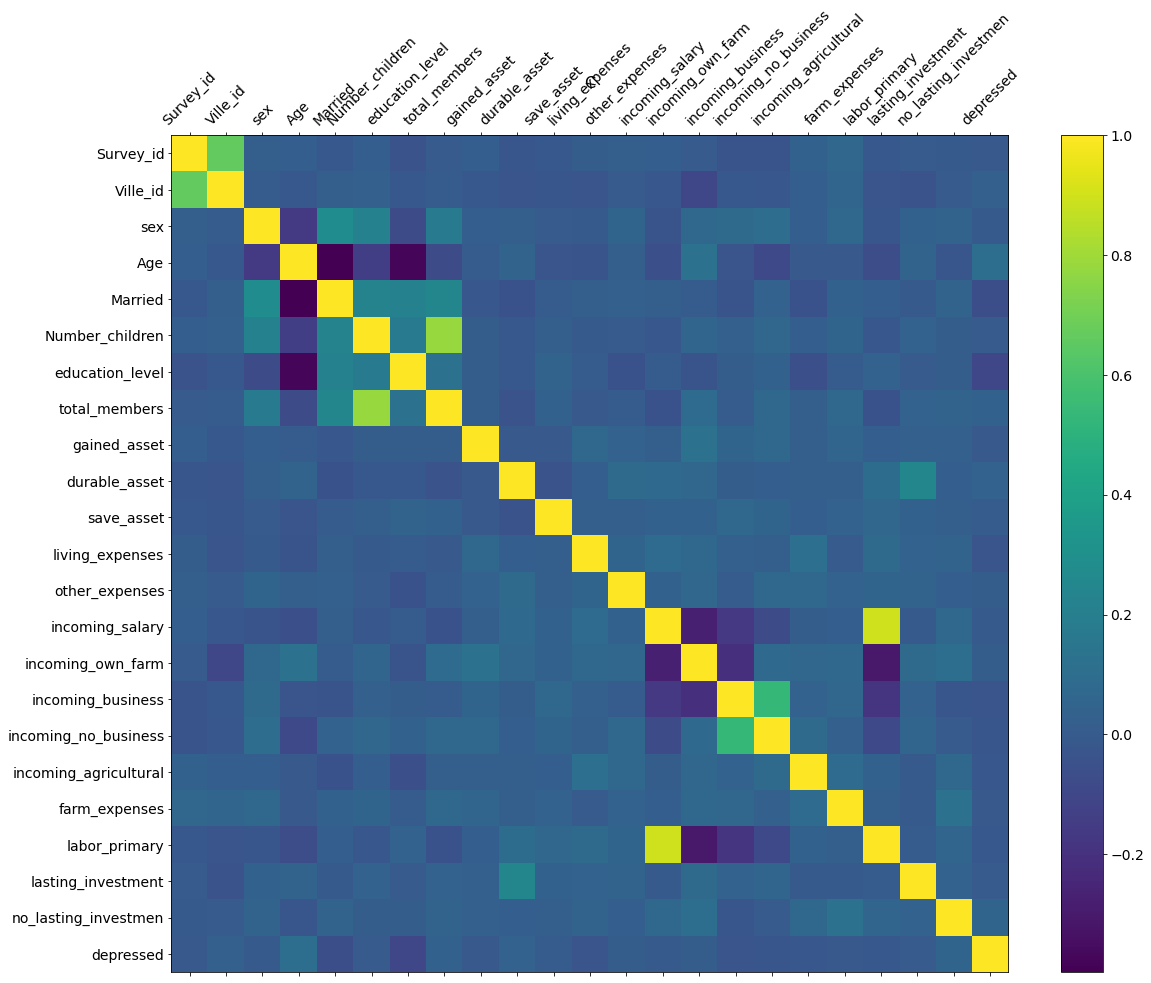

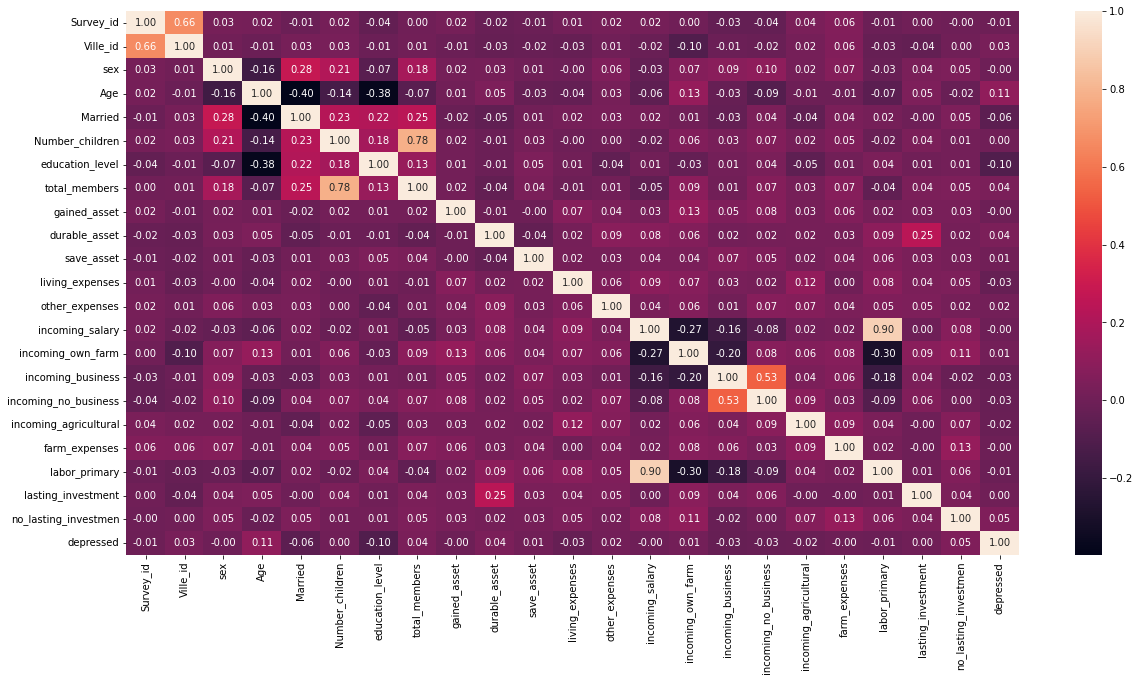

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.shape[1]), df1.columns, fontsize=14, rotation=45)
plt.yticks(range(df1.shape[1]), df1.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('C',fontsize=16);
plt.subplots(figsize=(20,10)) 
sns.heatmap(df1.corr(), annot = True, fmt = ".2f")
plt.show()

##Class pie chart

[1191, 238]


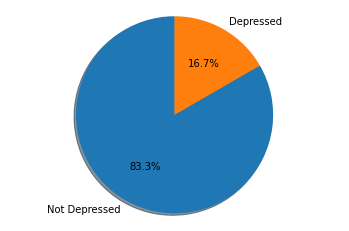

In [ ]:
fig1, ax1 = plt.subplots()
#get the count for males and females in the dataset
sex = [len(df1[df1.depressed==0]),len(df1[df1.depressed ==1] )]

labels =["Not Depressed", 'Depressed']
print(sex)
ax1.pie(sex,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


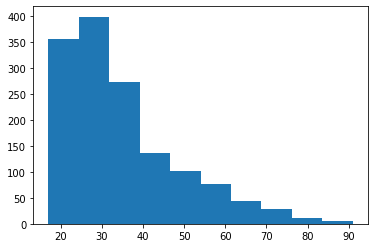

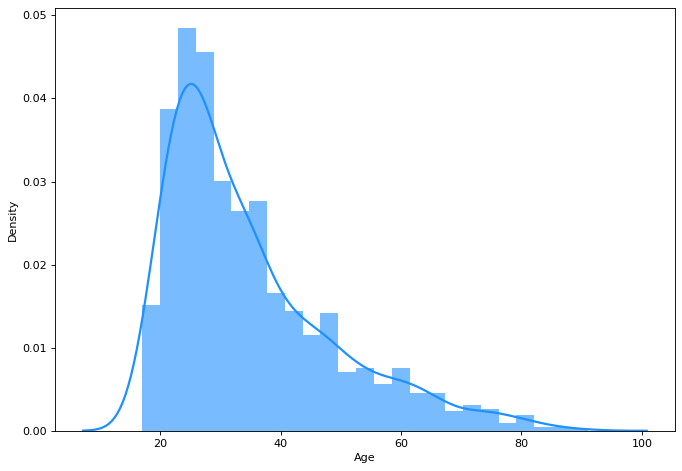

In [ ]:

fig, axs = plt.subplots()
axs.hist(df1['Age'])
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df1['Age'], color="dodgerblue", label="Compact", **kwargs)



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


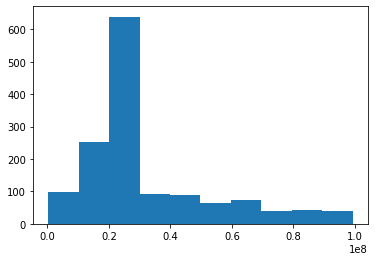

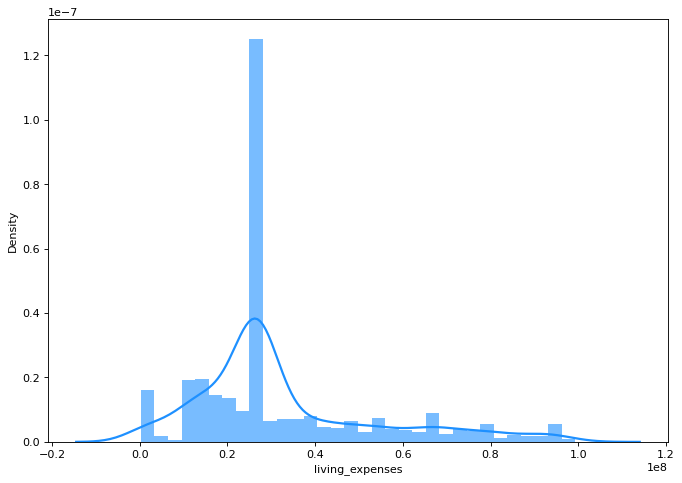

In [ ]:
fig, axs = plt.subplots()
axs.hist(df1['living_expenses'])

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df1['living_expenses'], color="dodgerblue", label="Compact", **kwargs)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


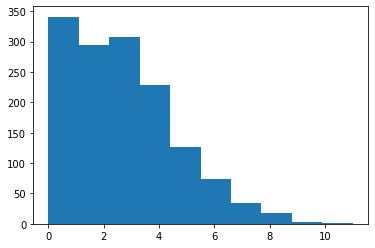

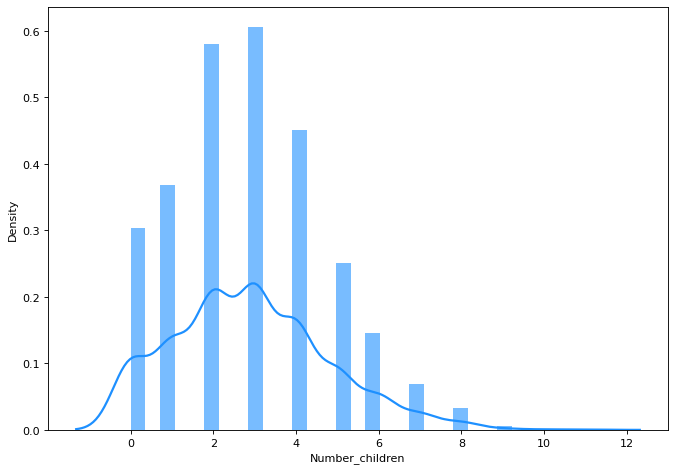

In [ ]:
fig, axs = plt.subplots()
axs.hist(df1['Number_children'])
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df1['Number_children'], color="dodgerblue", label="Compact", **kwargs)

[117, 1312]


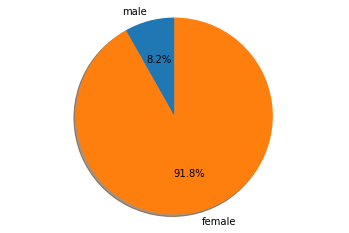

In [ ]:
fig1, ax1 = plt.subplots()
#get the count for males and females in the dataset
sex = [len(df1[df1.sex==0]),len(df1[df1.sex ==1] )]

labels =["male", 'female']
print(sex)
ax1.pie(sex,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


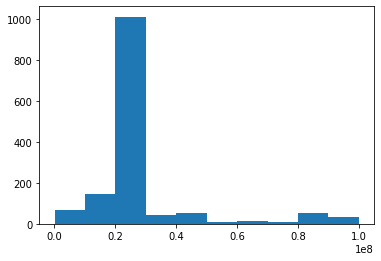

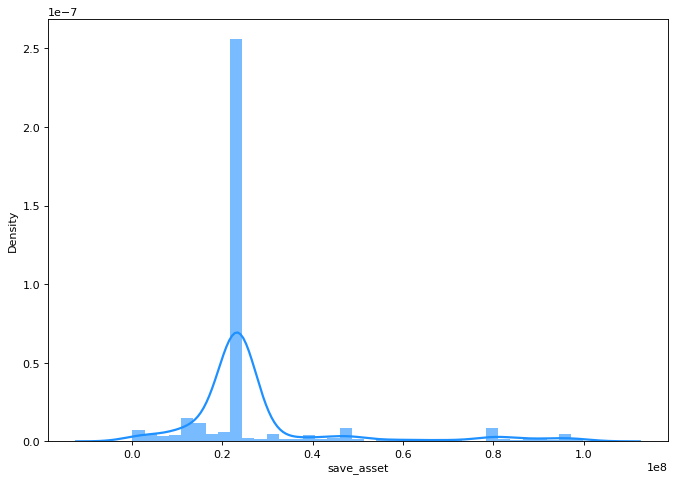

In [ ]:
fig, axs = plt.subplots()
axs.hist(df1['save_asset'])
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df1['save_asset'], color="dodgerblue", label="Compact", **kwargs)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


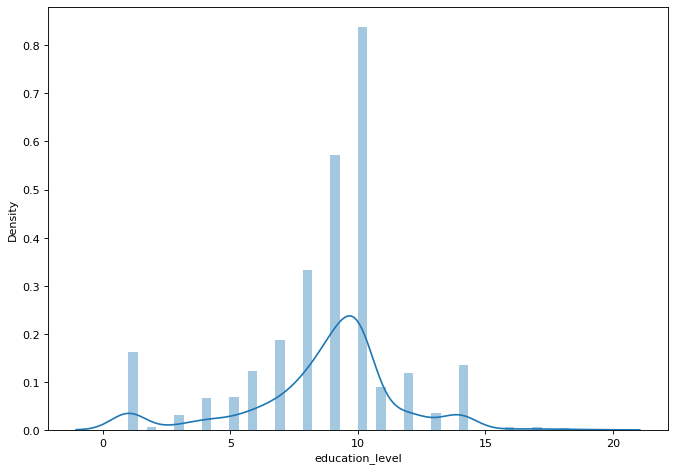

In [ ]:
plt.figure(figsize=(10,7), dpi= 80)
plt.subplot()
sns.distplot(df1['education_level'])

plt.show()

#4. Data Preperation and Extraction


In [ ]:
from sklearn.model_selection import train_test_split
#filling in missing values in no_lasting_investmen with the median value
df1['no_lasting_investmen'].fillna(df1['no_lasting_investmen'].median(), inplace=True)
df1.no_lasting_investmen.isnull().sum()

#get the data 
X_db = np.array(df1.values)[:,2:23]
y_db=np.array(df1.values)[:,-1]

trainX, testX, trainY, testY=train_test_split(X_db,y_db, test_size = 0.3)


#




#5. Theory
##A. Cross Validation
Cross-validation is a resampling procedure used to evaluate the machine learning models on a limited data sample

The procdure has a single parametr $k$ that refers to the number of groups that a given data sample is to to be slit into

Results in a less biased or less optimistc estimate of the model skill as compared to a simple train/test split

The Algorithm is as follows:
<ol type=1>
<li>Shuffle the dataset randomly</li>
<li>Split the data set into $k$ groups</li>
<li>For each unique group</li>
  <ol type=A>
    <li> Take the group as a hold out or test data set</li>
    <li>Take the remainng groups as a trainign data set</li>
    <li>Fit a model on the training set and evaluate it on the test set</li>
    <li>Retain the evaluation score and discard the model</li>
  </ol>
  <li>Summmarize the skill of the model using the sample of model evaluation score  </li>
</ol>
<br>

##Configutation of $k$
A poorly chosen $k$ may result in mis-representative idea of the skill of the model, such as a score with a high variance of high bias

The common tactic for choosing a value of $k$ are as follows
<ul>
<li>Representative: The value of $k$ is chosen such that each train/test group of data samples is large enough to be statistically representative of the broader dataset </li>
<li>$k=10$:The value of $k$ is fixed to $10$, a value that has been found through experimentation to genreally result in a model skill estimate with low bias and modest variance</li>
<li>$k=n$: The value for k is fixed to $n$, where $n$ is the size of the dataset to give each test sample a chance to be used in the hold out dataset. This approach is called leave-on cross validation  </li>
</ul>
